In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [42]:
data = pd.read_csv("data/Titanic_data.csv")
names = pd.read_csv("data/Titanic_names.csv")

In [43]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          1313 non-null   int64  
 1   PClass      1313 non-null   object 
 2   Age         1313 non-null   float64
 3   Gender      1313 non-null   object 
 4   Survived    1313 non-null   int64  
 5   GenderCode  1313 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 61.7+ KB


,id,Age,Survived,GenderCode
count,1313.000000,1313.000000,1313.000000,1313.000000
mean,657.000000,17.502574,0.342727,0.351866
std,379.174762,18.516945,0.474802,0.477734
min,1.000000,0.000000,0.000000,0.000000
25%,329.000000,0.000000,0.000000,0.000000
50%,657.000000,18.000000,0.000000,0.000000
75%,985.000000,30.000000,1.000000,1.000000
max,1313.000000,71.000000,1.000000,1.000000


In [44]:
names.info()
names.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1313 non-null   int64 
 1   Name    1313 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.6+ KB


,id
count,1313.000000
mean,657.000000
std,379.174762
min,1.000000
25%,329.000000
50%,657.000000
75%,985.000000
max,1313.000000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'GenderCode'}>]], dtype=object)

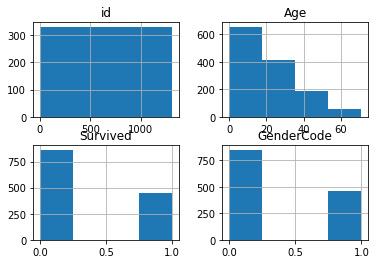

In [45]:
data.hist(bins=4)

In [46]:
df = data.merge(names, how="inner", on="id")
df

,id,PClass,Age,Gender,Survived,GenderCode,Name
0,1,1st,29.00,female,1,1,"Allen, Miss Elisabeth Walton"
1,2,1st,2.00,female,0,1,"Allison, Miss Helen Loraine"
2,3,1st,30.00,male,0,0,"Allison, Mr Hudson Joshua Creighton"
3,4,1st,25.00,female,0,1,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)"
4,5,1st,0.92,male,1,0,"Allison, Master Hudson Trevor"
...,...,...,...,...,...,...,...
1308,1309,3rd,27.00,male,0,0,"Zakarian, Mr Artun"
1309,1310,3rd,26.00,male,0,0,"Zakarian, Mr Maprieder"
1310,1311,3rd,22.00,male,0,0,"Zenni, Mr Philip"
1311,1312,3rd,24.00,male,0,0,"Lievens, Mr Rene"


In [47]:
len(df)

1313

In [48]:
len(df.query("Gender == 'female'"))

462

In [49]:
len(df.query("Gender == 'male'"))

851

In [50]:
round(df['Age'].mean(), 1)

17.5

In [51]:
len(df.query("Age == 0"))

557

In [55]:
m = df.query("Age != 0")["Age"].mean()
df.loc[df["Age"] == 0, "Age"] = m
df

,id,PClass,Age,Gender,Survived,GenderCode,Name
0,1,1st,29.00,female,1,1,"Allen, Miss Elisabeth Walton"
1,2,1st,2.00,female,0,1,"Allison, Miss Helen Loraine"
2,3,1st,30.00,male,0,0,"Allison, Mr Hudson Joshua Creighton"
3,4,1st,25.00,female,0,1,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)"
4,5,1st,0.92,male,1,0,"Allison, Master Hudson Trevor"
...,...,...,...,...,...,...,...
1308,1309,3rd,27.00,male,0,0,"Zakarian, Mr Artun"
1309,1310,3rd,26.00,male,0,0,"Zakarian, Mr Maprieder"
1310,1311,3rd,22.00,male,0,0,"Zenni, Mr Philip"
1311,1312,3rd,24.00,male,0,0,"Lievens, Mr Rene"


In [58]:
df.query("PClass == '*'")

,id,PClass,Age,Gender,Survived,GenderCode,Name
456,457,*,30.397989,male,0,0,Jacobsohn Mr Samuel


In [74]:
df["Survived"].value_counts()

0    863
1    450
Name: Survived, dtype: int64

In [87]:
[dieded, survived] = df["Survived"].value_counts()

display(f"{round((survived / len(df)) * 100)}%")
display(F"{round((dieded / len(df)) * 100)}%")

TypeError: unsupported operand type(s) for +: 'int' and 'str'